In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
df=pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

In [16]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [19]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [20]:
df.isna()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,False,False,False,False,False,False,False,False,False,False,False,False
3995,False,False,False,False,False,False,False,False,False,False,False,False
3996,False,False,False,False,False,False,False,False,False,False,False,False
3997,False,False,False,False,False,False,False,False,False,False,False,False


In [21]:
df.drop(['ID#'],axis=1,inplace=True)

In [22]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
#### normalization

In [24]:
df1=StandardScaler().fit_transform(df)

In [26]:
df1

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [33]:
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [34]:
### elbow graph ( to find k value)

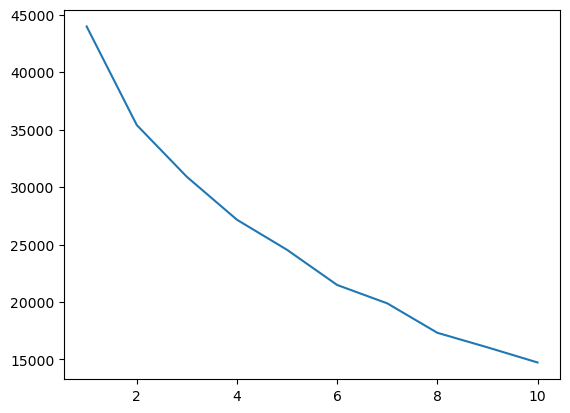

In [35]:
plt.plot(range(1,11),wcss)

In [40]:
### cluster algorithim using k=4

In [88]:
clusters4=KMeans(4,random_state=30).fit(df1)

In [89]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0])

In [90]:
df2=df.copy()

In [91]:
df2['clusters4id']=clusters4.labels_

In [92]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [93]:
clusters4.cluster_centers_

array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [94]:
df2.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


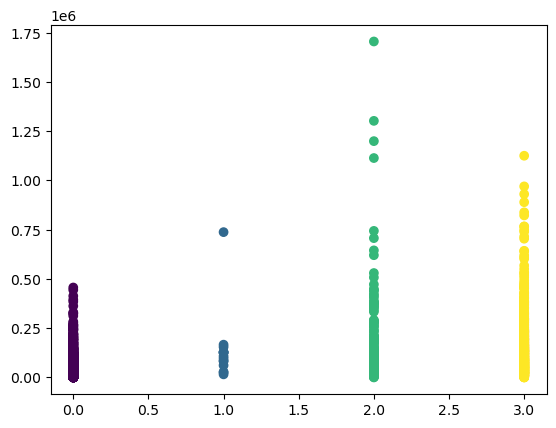

In [96]:
plt.scatter(df2['clusters4id'],df2['Balance'], c=clusters4.labels_) 

In [ ]:
### cluster algorithim using k=6

In [97]:
clusters6=KMeans(6,random_state=30).fit(df1)

In [99]:
clusters6.labels_

array([1, 1, 1, ..., 4, 1, 1])

In [102]:
df3=df.copy()

In [106]:
df3['cluster6id']=clusters6.labels_

In [107]:
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluser6id,cluster6id
0,28143,0,1,1,1,174,1,0,0,7000,0,1,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,4,4
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,1


In [109]:
clusters6.cluster_centers_

array([[ 1.20426621,  0.81196483,  0.15486678, -0.09824189, -0.06276658,
         0.69273314,  1.70694295,  3.78020778,  4.04268936,  0.26763996,
         0.88395812],
       [-0.29988229, -0.09334038, -0.54506393, -0.09824189, -0.06030027,
        -0.51287072, -0.4646941 , -0.21965344, -0.24118939, -0.24024327,
        -0.7669193 ],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 0.63339128, -0.01696192,  1.48677647, -0.09824189, -0.05140844,
         1.26732627,  0.83854306, -0.06918053, -0.06956454,  0.45886978,
         0.44298241],
       [-0.15659711,  0.12337152, -0.26583399, -0.09824189, -0.06276658,
        -0.26896266, -0.10693019, -0.03200574, -0.03025317,  0.05656907,
         1.29380418],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.051

In [111]:
df3.groupby('cluster6id').agg(['mean']).reset_index()

,cluster6id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluser6id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,194946.881119,772.223776,2.272727,1.000000,1.000000,33872.930070,27.993007,5752.475524,16.706294,4671.202797,0.797203,0.0
1,1,43355.506024,71.978795,1.307470,1.000000,1.000482,4746.666024,7.132530,152.680482,0.459277,3619.093494,0.000000,1.0
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,2.0
3,3,137281.744469,130.703540,4.103982,1.000000,1.002212,47683.837389,19.642699,362.397124,1.107301,5070.663717,0.582965,3.0
4,4,57822.123321,239.550672,1.693529,1.000000,1.000000,10649.949939,10.575092,415.246642,1.258852,4235.367521,0.995116,4.0
5,5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,5.0


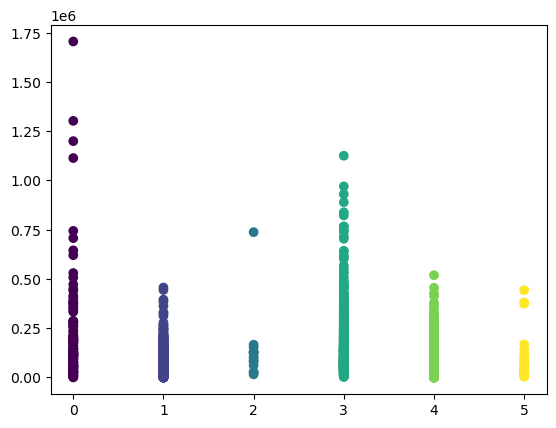

In [114]:
plt.scatter(df3['cluster6id'],df3['Balance'], c=clusters6.labels_) 